In [1]:
from pymongo import MongoClient
client = MongoClient()
db = client.whosampled
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import random

np.set_printoptions(threshold=sys.maxsize)
pd.options.display.max_seq_items = 10000
from src.test_ranking import *

%reload_ext autoreload

# Surprise

I would like to see if the Surprise library performs any better on the data

One important fact is that 93% of all of the producers only sampled a song once. 
Then 4% sampled a song twice. 

So we are really, for 97% of the data, just saying, did this producer sample this song or not.

So I am going to replace all the actual counts with 1.

When I run SVDpp on this dataset, where counts are replaced with 1, I get a RMSE of _ and a MAE of _ . This is in comparison to using baseline, which is

OK. As of Oct 2018, surprise only supports explicit ratings, not implicit.

No more surprise

In [123]:
import surprise
from surprise import SVDpp
from surprise.model_selection import cross_validate
from surprise import Reader
from surprise import Dataset
from surprise import NormalPredictor

,new_song_producer,sampled_artist_song
counts,,
1,0.939903,0.939903
2,0.044731,0.044731
3,0.009052,0.009052
4,0.003020,0.003020
5,0.001391,0.001391
6,0.000707,0.000707
7,0.000439,0.000439
8,0.000245,0.000245
9,0.000141,0.000141


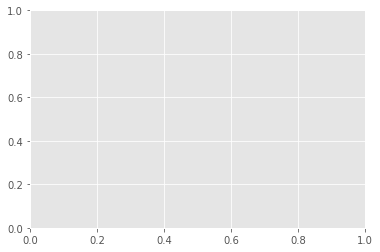

In [116]:
# Here i show that 97% of the producer-sampled song connections only occurred once.

fig, ax = plt.subplots()
num_samps = new.counts.values
new.groupby('counts').count() / len(new)
#_ = ax.hist(num_samps, bins = 165)

In [117]:
# dataframe must have three columns 
# corresponding to the user (raw) ids, the item (raw) ids, and the ratings 
# in this order

#Remove other columns
df = df[['new_song_producer', 'sampled_artist_song']]

#Create a new column of just 1s
df['ratings'] = 1

In [119]:
reader = Reader(rating_scale=(0, 1))

In [122]:
data = Dataset.load_from_df(
    df[['new_song_producer', 'sampled_artist_song', 'ratings']], reader)

In [124]:
cross_validate(SVDpp(), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

KeyboardInterrupt: 

In [61]:
trainset = data.build_full_trainset()
algo = SVD()
algo.fit(trainset)

In [101]:
algo.predict('J Dilla',
    "Dabrye - game over"
   )

Prediction(uid='J Dilla', iid='Dabrye - game over', r_ui=None, est=1.031985105051595, details={'was_impossible': False})

In [91]:
trainset.to_inner_uid("J Dilla")

9117

In [100]:
trainset.to_inner_iid("Dabrye - game over")

11256

In [28]:
new = df.groupby(['new_song_producer', 'sampled_artist_song'])\
        .size().reset_index(name = 'counts')
